# Linear Regression I: Homework

### Question 1:

We have used the following code to generate different datasets with the same underlying properties but different noise ($\epsilon$). 

To change the noise but not the underlying function, we have set `NumPy`'s `random.seed` to a different value (e.g., 42, 100, 34, etc). 

Each different random seed generated a slightly different dataset for us. Using this approach each dataset is generated using the same underlying function (a quadratic). 

In practice, all datasets are generated using the same properties of the function, such as, the min and max `x` data, the same number of datapoints (20) and the same scale of noise (the noise will be different but the scale of the noise will be the same, set to 5 in the code below). 

In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
np.random.seed(42)
x = np.linspace(-5, 5, num=20)
y = 2*x**2 - x + 1 + np.random.normal(scale=5, size=len(x))

Your task is to use and modify that code above so as to generate 20 datasets with different noise characteristics, yet generated using the same underlying function. 

For each dataset:

* Fit it with line and compute SSE
* Fit it with parabola and compute SSE
* Fit it with 12th-order polynomial and computet the SSE
* For each type of model used to fit the datasets, make a plot of the mean and STD of the SSEs obtained across all datasets.
* Describe the result obtained also making sure to answer the following questions:
    * Which model fit has a smaller SSE on average?
    * Which model has a more variable SSE across repeats? Why?

Make sure you are approaching your coding using the best practices learned in class so far. Make proficient use of function definitions so as to limite repetitions in your code.

In [42]:
def fit_and_sse(x, y, degree):
    model_coeffs = np.polyfit(x, y, deg = degree)
    model_fit = np.polyval(model_coeffs, x)
    
    sse = sum((model_fit - y)**2)
    
    return model_coeffs, model_fit, sse

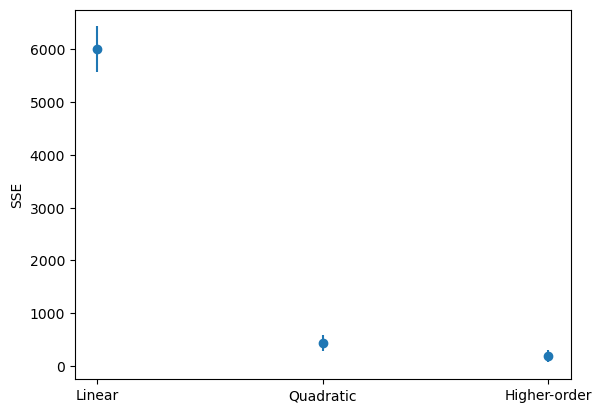

In [68]:
# 20 randomly chosen seeds
seeds = [20, 30, 42, 100, 34, 45, 67, 90, 78, 80, 59, 50, 85, 63, 97, 10, 26, 38, 41, 57]

linear_SSEs = []
quadratic_SSEs = []
higherorder_SSEs = []

# find the SSEs of all three models across 20 datasets
for i in range(len(seeds)):
    np.random.seed(i)
    x = np.linspace(-5, 5, num=20)
    y = 2*x**2 - x + 1 + np.random.normal(scale=5, size=len(x))
    
    linear = fit_and_sse(x, y, 1)[2]
    quadratic = fit_and_sse(x, y, 2)[2]
    overfit = fit_and_sse(x, y, 12)[2]
    
    linear_SSEs.append(linear)
    quadratic_SSEs.append(quadratic)
    higherorder_SSEs.append(overfit)

# compute the mean and standard deviations
models = ['Linear', 'Quadratic', 'Higher-order']
SSE_means = [np.mean(linear_SSEs), np.mean(quadratic_SSEs), np.mean(higherorder_SSEs)]
SSE_sds = [np.std(linear_SSEs), np.std(quadratic_SSEs), np.std(higherorder_SSEs)]

# plot the mean and standard deviations of SSEs across all datasets
plt.errorbar(models, SSE_means, yerr=SSE_sds, fmt='o')
plt.ylabel("SSE");

The linear model has the highest average SSE of around 6000; quadratic and higher-order models have a smaller average SSE of less than 1000, and higher-order models have the smallest SSE on average. The linear model has a more variable SSE across repeats, as its error bars are the most spread out on the plot. 

### Question 2

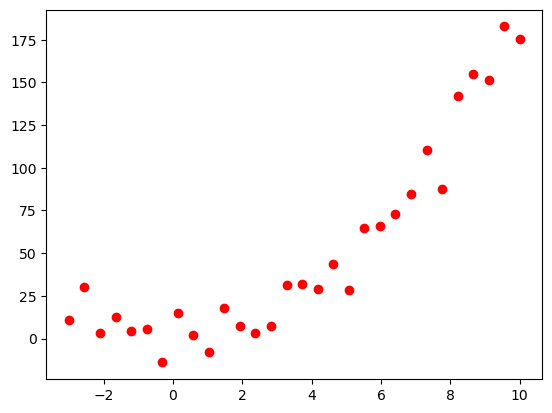

In [41]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)
x1 = np.linspace(-3, 10, num=30)
y1 = 2*x1**2 - x1 + 1 + np.random.normal(scale=9, size=len(x1))

plt.scatter(x1, y1, color='red', label = 'data')
plt.show()

#### Q 2.1

Fit the dataset using a:
* second order polynomial (save the coefficients of this model in variable `q_coeffs`)
* third order polynomial (save the coefficients of this model in variable `t_coeffs`)
* Compute the SSE for each model and determine which model is better, motivate your choice with numbers, text and plots.

The quadratic model SSE is 3428.0929175646243, and the cubic model SSE is 3426.676260423881.


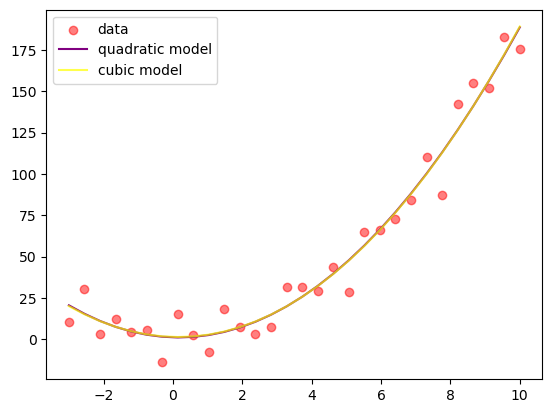

In [70]:
# coefficients, y_hat, sse = fit_and_sse(x1, y1, 2)

# second order polynomial
quadratic = fit_and_sse(x1, y1, 2)
q_coeffs = quadratic[0]
q_fit = quadratic[1]

# third order polynomial
cubic = fit_and_sse(x1, y1, 3)
t_coeffs = cubic[0]
t_fit = cubic[1]

#compute SSE for each model
q_sse = quadratic[2]
t_sse = cubic[2]
print(f"The quadratic model SSE is {q_sse}, and the cubic model SSE is {t_sse}.")

#plot polynomials against the data
plt.scatter(x1, y1, color='red', label = 'data', alpha = 0.5)
plt.plot(x1, q_fit, color = 'purple', label = 'quadratic model')
plt.plot(x1, t_fit, color = 'yellow', label = 'cubic model', alpha = 0.7)        
plt.legend()
plt.show()

Both quadratic and cubic models are good fits for the data. The two models almost exactly overlap and capture the general pattern of the data. The cubic model is better than the quadratic model as it has a slightly smaller SSE.

#### Q 2.2

Let's now create a new x for us:

In [71]:
x_new = np.linspace(-10, 10, num=30)

Your task is to use `q_coeffs` and `t_coeffs` in combination to this new `x_new` values to evaluate the model outside of the original range of the data (Hint: You should cosinder using  `polyval` to implement this).

Note that above we are asking you to evaluate the original model fit within a certain range of x-values onto a new range of values. In a certain ways, we are asking you to use the models to make predictions of data outside of the original range of values. You are predicting data really **out there**!

Next, do the following:
* Plot the orginal x and the oriignal y (the orignal data) as black symbols.
* Using different colors, plot on top of the same figure, the models fit over the new range of values (the models used to make the prediction). [Just to make sure, this plot should have data plus two curves]
* Describe what you see:
    * do both model seem reasonably good at making the prediction?
    * which model seems better and why?
    * which model had a better SSE? 
    * is the result with the SSE consistent with what it appears here from the plot?
    * how do you interpret what it is going on here?


The quadratic model SSE is 139135.42922239966, and the cubic model SSE is 127530.62503257378.


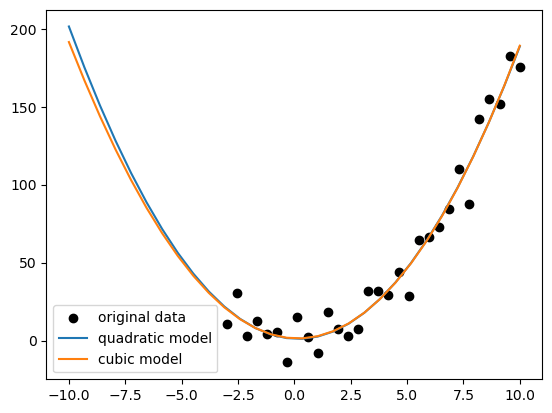

In [74]:
# new fits for both polynomial
q_fit_new = np.polyval(q_coeffs, x_new)
t_fit_new = np.polyval(t_coeffs, x_new)

# plots
plt.scatter(x1, y1, color = 'black', label = 'original data')
plt.plot(x_new, q_fit_new, label = 'quadratic model')
plt.plot(x_new, t_fit_new, label = 'cubic model')
plt.legend();

# compute new SSEs
q_sse_new = sum((q_fit_new - y1)**2)
t_sse_new = sum((t_fit_new - y1)**2)

print(f"The quadratic model SSE is {q_sse_new}, and the cubic model SSE is {t_sse_new}.")

Both models are reasonably good at making the prediction. From looking at the plot, the two models perform similarly as they almost completely overlap. The cubic model seems better because it has a smaller SSE than the quadratic model. In other words, the cubic model had a better SSE than the quadratic model. The SSE is somewhat consistent with what appears in the plot. The plot predicts the data well before the original data points appear, with x starting from -10 instead of -3, which is likely why both SSEs are so large. Instead of merely capturing the trend of the original data points, this plot allows us to predict the data's pattern if x began at -10.